<div class="alert alert-success" role="alert">
  <h1 class="alert-heading">Regresión Componentes Principales (PCR)</h1>
  <h3 class="alert-heading">Prof. Enrique Mejía Ospino, emejia@uis.edu.co</h3>
  <h4 class="alert-heading">Escuela de Química</h4>
  <h5 class="alert-heading">Universidad Industrial de Santander</h5>
  <p>
  </div>

<p style="text-align:justify"><div class="alert alert-success">

## <font color=black> Regresión Componentes Principales (PCR)
**<font color=black> La regresión de componentes principales (PCR) se puede realizar usando la función PCA() de la biblioteca (sklearn). Aplicaremos la PCR a los datos que hemos utilzado ante, para predecir la propiedad.**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import scale, StandardScaler, Normalizer
from sklearn.model_selection import cross_val_predict, KFold, StratifiedKFold, train_test_split, cross_validate, cross_val_score
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.cross_decomposition import PLSRegression, PLSSVD
from sklearn.metrics import mean_squared_error, r2_score
import scipy.io #scipy.io me permite leer datos construidos en matlab
from scipy import stats # importando scipy.stats
from scipy.signal import savgol_filter
import scipy as sio
%matplotlib inline

**<font color=blue> Vamos  atilizar para este ejemplo dos archivos en formato de Matlab que contienen (espectros.mat), el primero, las intensidades de espectros FTICR de 40 muestras crudos fracciones y el segundo (propiedad.mat) el valor medido de una propiedad ccr de las muestras.** 

In [3]:
espectros = scipy.io.loadmat('C://Users/Enrique Mejia/Documents/Data_processing/data_ms_ccr.mat')# 
propiedad = scipy.io.loadmat('C://Users/Enrique Mejia/Documents/Data_processing/prop_ccr.mat')#

In [4]:
espectros['data1'].shape, propiedad['data'].shape # miramos la forma para ver si concuerdan, en este
# caso 40 muestras y 59692 señales de masas

((40, 59692), (40, 1))

In [6]:
data_prop=propiedad['data']
data_signals=espectros['data1']
#xftir=np.transpose(xftir)# usamos la transpuesta del archivo si es necesario

**<font color=blue> Se realizará un sencillo pre-procesamiento a los espectros, para este ejemplo, podemos escalar los datos con la función StandardScaler o Normalizar con la función Normalizer.  Escogeremos alguna de las dos y luego hacemos la Regresión lineal.** 

In [7]:
#normalizamos los datos
scaler=StandardScaler()
norma=Normalizer()

scaler.fit(data_signals) # calculo la media para poder hacer la transformacion
x_scaled=scaler.transform(data_signals)# Ahora si, escalo los datos y los normalizo
x_norm = preprocessing.normalize(data_signals, norm='l1')# Normaliza los datos
x_nsd = savgol_filter(x_norm, 17, polyorder=2, deriv=2) # Realiza segunda derivada de los datos

In [8]:
pca = PCA()
X_reduced = pca.fit_transform((x_norm))
pd.DataFrame(pca.components_.T).loc[:4,:100]

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,0.021331,-0.007735,-0.005562,-0.020191,-0.000548,0.030541,-0.041710,-0.018757,-0.095712,-0.126058,...,0.014878,-0.005509,0.027042,0.025043,0.030201,-0.066483,-0.004331,0.006320,0.017664,0.465556
1,0.033265,-0.013120,-0.016924,-0.035159,-0.008629,0.052307,-0.085238,-0.000234,-0.114689,-0.089838,...,-0.073895,-0.041701,0.008526,0.052980,-0.002668,0.007243,-0.024222,-0.031259,0.073920,0.153559
2,0.054649,-0.012915,-0.040547,-0.055826,-0.044378,0.058339,-0.132005,-0.003010,-0.090506,-0.028600,...,-0.011947,0.027987,0.000545,0.033499,0.009374,0.015544,-0.005680,0.000297,0.060257,-0.049306
3,0.061209,0.008382,-0.016939,-0.007924,-0.049698,-0.001737,0.048459,-0.002009,0.044490,-0.049859,...,0.014446,0.074010,-0.004808,-0.003160,0.071877,-0.040656,0.039219,0.122718,-0.019897,0.133458
4,0.065865,-0.013969,-0.050596,-0.064185,-0.069716,0.081100,-0.108193,0.064194,-0.127093,-0.037818,...,-0.097950,-0.086101,0.018722,0.056309,-0.024535,0.025167,0.000790,0.009938,0.007303,-0.245213


In [12]:
# Crear el modelo de regresión lineal
regr = LinearRegression()

# Realizar el ajuste con los datos reducidos
X_reduced_pc = pca.fit_transform((x_norm))[:, :9]
regr.fit(X_reduced_pc, data_prop)
y_pred = regr.predict(X_reduced_pc)

In [13]:
# Calculamos algunas métricas
r2 = r2_score(data_prop, y_pred)
mse = mean_squared_error(data_prop, y_pred)
rpd = data_prop.std()/np.sqrt(mse)
#round(score_c, 2), round(mse, 2), round(rpd, 2)
print('MSE = ' + str(round(mse, 2)))
print('r2 = ' + str(round(r2, 2)))
print('rpd = ' + str(round(rpd, 2)))

MSE = 14.48
r2 = 0.85
rpd = 2.55


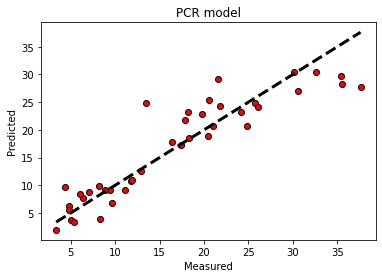

In [14]:
ax = plt.gca()
ax.scatter(data_prop, y_pred, edgecolors=(0, 0, 0), color='red')
ax.plot([data_prop.min(), data_prop.max()], [data_prop.min(), data_prop.max()], 'k--', lw=3)
plt.title('PCR model')
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.show()

In [15]:
# Separamos las muestras
x_train, x_test , y_train, y_test = model_selection.train_test_split(x_norm, data_prop, test_size=0.7, random_state=1, shuffle=False)

In [16]:
def optimise_pcr(X, y, n_comp):
    
    # Definimos PCR y el número de componentes
    pcr = LinearRegression()
    X = pca.fit_transform((X))[:, :n_comp]
    pcr.fit(X, y)
    y_pred1 = pcr.predict(X)
    # Calculamos métricas
    r2 = r2_score(y, y_pred1)
    mse = mean_squared_error(y, y_pred1)
    rpd = y.std()/np.sqrt(mse)
    
    return (y_pred1, r2, mse, rpd)

In [17]:
# probamos con 20 componentes
r2s = []
mses = []
rpds = []
yp1 = []
arr_comp = np.arange(1, 21)
for n_comp in arr_comp:
    y_pred1, r2, mse, rpd = optimise_pcr(x_train, y_train, n_comp)
    r2s.append(r2)
    mses.append(mse)
    rpds.append(rpd)
    yp1.append(y_pred1)

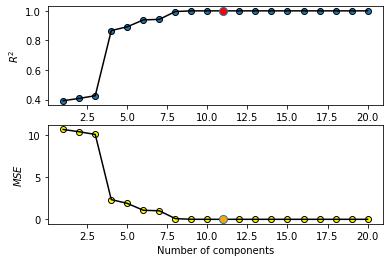

In [18]:
fig, (ax1, ax2) = plt.subplots(2, 1)
#fig, ax = plt.subplots()
ax1.scatter(arr_comp, r2s, edgecolors=(0, 0, 0))
ax1.plot(arr_comp, r2s, 'k-')
ax1.plot(arr_comp[np.argmax(r2s)], np.array(r2s)[np.argmax(r2s)], 'o', ms=8, mfc='red')
ax1.set_xlabel('Number of components')
ax1.set_ylabel('$R^2$')


ax2.scatter(arr_comp, mses, color='yellow', edgecolors=(0, 0, 0))
ax2.plot(arr_comp, mses, 'k-')
ax2.plot(arr_comp[np.argmin(mses)], np.array(mses)[np.argmin(mses)], 'o', ms=8, mfc='orange')
ax2.set_xlabel('Number of components')
ax2.set_ylabel('$MSE$')
plt.show()

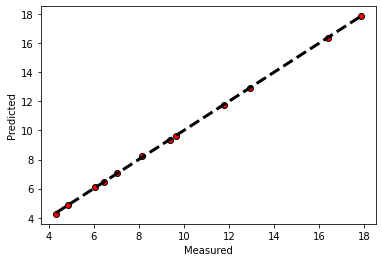

MSE = 0.0


In [19]:
fig, ax = plt.subplots()
ax.scatter(y_train, yp1[8], color='red', edgecolors=(0, 0, 0))
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=3)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()
print('MSE = ' + str(round(mean_squared_error(y_train, yp1[8]), 2)))

In [21]:
X_reduced_test = pca.transform((x_test))[:,:8]
X_reduced_train = pca.transform((x_train))[:,:8]
# Train regression model on training data 
regr = LinearRegression()
regr.fit(X_reduced_train[:,:8], y_train)

# Prediction with test data
y_pred_test = regr.predict(X_reduced_test)
mean_squared_error(y_test, y_pred_test)

212.88929847926187

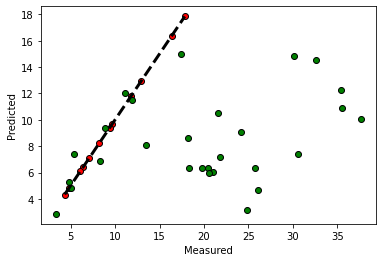

MSE = 0.0


In [22]:
fig, ax = plt.subplots()
ax.scatter(y_train, yp1[8], color='red', edgecolors=(0, 0, 0))
ax.scatter(y_test, y_pred_test, color='green', edgecolors=(0, 0, 0))
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=3)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()
print('MSE = ' + str(round(mean_squared_error(y_train, yp1[8]), 2)))

In [27]:
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error, r2_score
kf = KFold(n_splits=5, shuffle=True, random_state=42) # Vamos hacer 5 separaciones sin barajar en cada separación
model=LinearRegression()
x_traint = [] # Creamos arreglos de cada grupo de datos en los que almacenamos las diferentes divisiones 
x_testt = [] # Luego podremos utilizar la mejor separación para obtener el modelo más apropiado
y_traint = []
y_testt = []
r2s = []
mses = []
x_reduced = pca.transform((x_norm))[:,:8]
i = 1
for train_index, test_index in kf.split(x_reduced):
    x_train = x_reduced[train_index]
    x_test = x_reduced[test_index]
    y_train = data_prop[train_index]
    y_test = data_prop[test_index]
    model.fit(x_train, y_train) #
    mse = mean_squared_error(y_test, model.predict(x_test))
    r2= r2_score(y_test, model.predict(x_test))
    
    # Almacenamos cada grupo en los arreglos creados
    x_traint.append(x_train) 
    x_testt.append(x_test)
    y_traint.append(y_train)
    y_testt.append(y_test)
    r2s.append(r2)
    mses.append(mse)
   
    # Entrenamos el modelo para cada separación the model
    model.fit(x_train, y_train) #Training the model
    print(f"MSE. {i} on the test set: {mean_squared_error(y_test, model.predict(x_test))}")
    print(f"R2. {i} on the test set: {r2_score(y_test, model.predict(x_test))}")
    i += 1

MSE. 1 on the test set: 35.74005983391057
R2. 1 on the test set: 0.7286221417425769
MSE. 2 on the test set: 20.62683435980157
R2. 2 on the test set: 0.7787015052345012
MSE. 3 on the test set: 9.28296807448655
R2. 3 on the test set: 0.8650407595138107
MSE. 4 on the test set: 26.206406090918986
R2. 4 on the test set: 0.7193798623325132
MSE. 5 on the test set: 22.31482776250942
R2. 5 on the test set: 0.2943640356879156


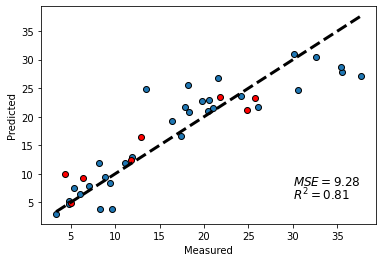

In [28]:
y_tr=np.array(y_traint[r2s.index(max(r2s))]) # Escogemos el mejor set a partir del que presente el
y_te=np.array(y_testt[r2s.index(max(r2s))]) # el valor máximo de r2. Podríamos también elegir el que
X_tr=np.array(x_traint[r2s.index(max(r2s))]) # presente el menor valor del mse
X_te=np.array(x_testt[r2s.index(max(r2s))])
model.fit(X_tr, y_tr) # Ejecutamos el modelo PLS con el set de entranamiento de mejor comportamiento

Y_pred = model.predict(X_tr) # Con el modelo predicimos los valos de la propiedad
Y_pred_test = model.predict(X_te) # Evaluamos las muestras de prueba

fig, ax = plt.subplots()
ax.scatter(y_tr, Y_pred, edgecolors=(0, 0, 0))
ax.scatter(y_te, Y_pred_test, color='red', label='test set', edgecolors=(0, 0, 0))
ax.plot([y_tr.min(), y_tr.max()], [y_tr.min(), y_tr.max()], 'k--', lw=3)
ax.text(30,8, r"$MSE = "+str("{0:.2f}".format(mean_squared_error(y_te, Y_pred_test)))+r"$", fontsize=12, color="black")
ax.text(30,5.5, r"$R^2 = "+str("{0:.2f}".format(r2_score(y_tr, Y_pred)))+r"$", fontsize=12, color="black")
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()